In [115]:
from scipy.stats import norm
import numpy as np

SpotPrice = 100
StrikePrice = 90
TimeToMaturity = 1.5
Volatility = 0.3
RiskFreeRate = 0.05

d1 = (np.log(SpotPrice/StrikePrice) + (RiskFreeRate+0.5*Volatility*Volatility)*TimeToMaturity) / (Volatility*(TimeToMaturity**0.5))
   
d2 = d1 - Volatility * (TimeToMaturity**0.5)

def callPrice(SpotPrice, StrikePrice, TimeToMaturity, RiskFreeRate, Volatility):
    return SpotPrice*norm.cdf(d1) - StrikePrice*np.exp(-RiskFreeRate*TimeToMaturity)*norm.cdf(d2)

theSpots = np.arange(StrikePrice-10, StrikePrice+11)

vecCallPrice = np.vectorize(callPrice)
thePrices = vecCallPrice(theSpots, StrikePrice, TimeToMaturity, RiskFreeRate, Volatility)

def Payoff(SpotPrice, StrikePrice):
    return max(SpotPrice-StrikePrice,0)

vecPayoff = np.vectorize(Payoff)
thePayoff = vecPayoff(theSpots, StrikePrice)

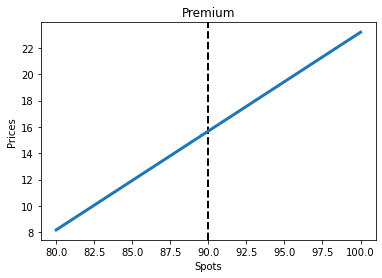

In [116]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

plt.xlabel("Spots")
plt.ylabel("Prices")
plt.title("Premium")

plt.axvline(x=StrikePrice, color = 'Black', linestyle = '--', linewidth =2)

line = plt.plot(theSpots, thePrices)
plt.setp(line, linewidth=3)
plt.show()

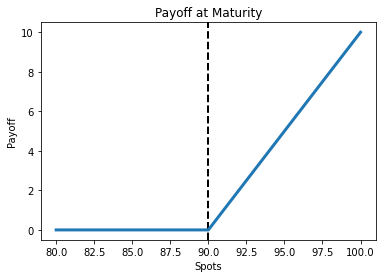

In [117]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

plt.xlabel("Spots")
plt.ylabel("Payoff")
plt.title("Payoff at Maturity")

plt.axvline(x=StrikePrice, color = 'Black', linestyle = '--', linewidth =2)

line = plt.plot(theSpots, thePayoff)
plt.setp(line, linewidth=3)
plt.show()

In [118]:
theSpots

array([ 80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100])

In [119]:
thePrices

array([ 8.18087695,  8.93090908,  9.68094122, 10.43097335, 11.18100549,
       11.93103763, 12.68106976, 13.4311019 , 14.18113403, 14.93116617,
       15.6811983 , 16.43123044, 17.18126257, 17.93129471, 18.68132684,
       19.43135898, 20.18139111, 20.93142325, 21.68145538, 22.43148752,
       23.18151965])

In [120]:
thePayoff

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  2,  3,  4,  5,  6,
        7,  8,  9, 10])